# Titanic Kaggle Challenge

Link to the challenge: https://www.kaggle.com/c/titanic<br>
Link to notebook that most information was pulled from: https://www.kaggle.com/mviola/titanic-eda-simple-model-0-80861

## Overview

### Imports

In [4]:
# core
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

# model building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Initialize dataframes

In [5]:
test = pd.read_csv("./Data/test.csv")
train = pd.read_csv("./Data/train.csv")
gender = pd.read_csv("./Data/gender_submission.csv")

## Test data

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Training data

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Test info

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Train info

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analyzing the data
<br>
Now that we have an idea of how our data is structured, we can look into specific statitics associated with our data.
<br>

### Survival rate for all passengers

In [10]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

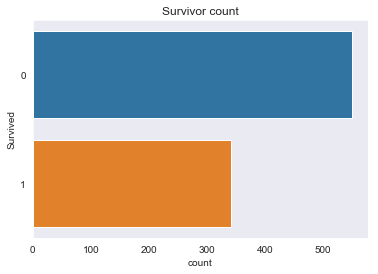

In [11]:
g = sns.countplot(y=train['Survived']).set_title('Survivor count')

By observing this data we can clearly see that only 38.4% of passengers survived.

### Surival rate determined by sex

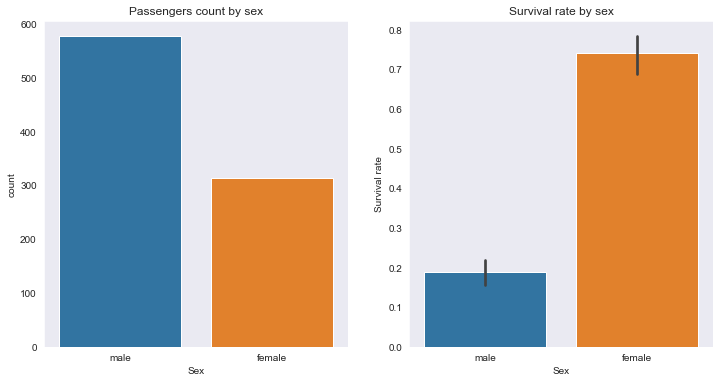

In [12]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train, ax=axarr[1]).set_ylabel('Survival rate')

Based upon these results we can easily determine that females had a far higher survival rate in compairson to men.

### Survival rate determined by class

In [13]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

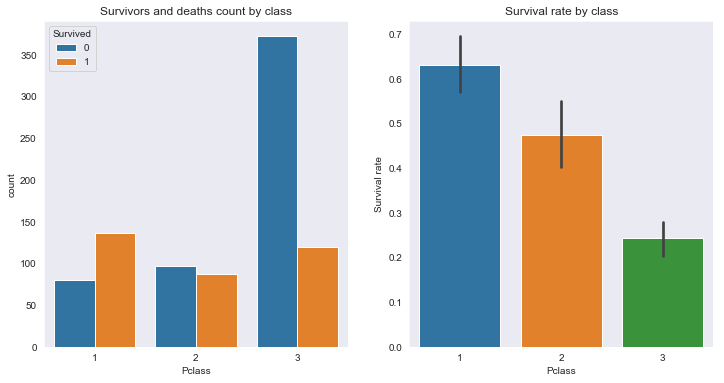

In [14]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train, ax=axarr[0]).set_title('Survivors and deaths count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train, ax=axarr[1]).set_ylabel('Survival rate')

Based on this data we can clearly see that the survival rate for first class passengers were much higher than subsequent classes.

### Survival rate determined by sex & class

In [15]:
train.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

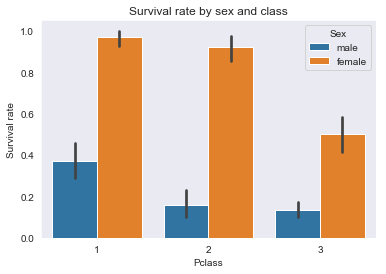

In [16]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train).set_ylabel('Survival rate')

### Survival rate determined by age

In [17]:
train.groupby(['Age']).Survived.mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

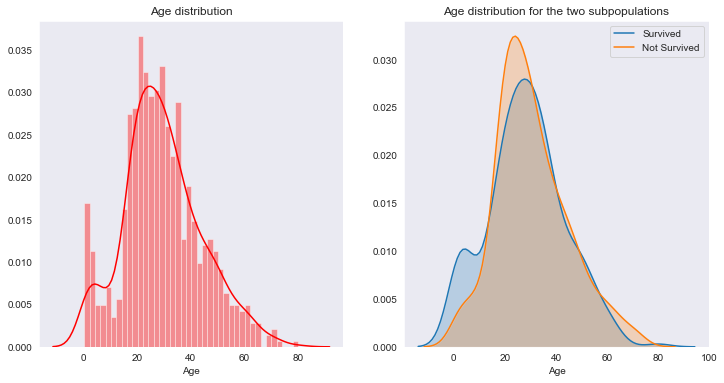

In [18]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')

# train[train['Age'].notna()] is done to remove all NaN fields within the dataframe.
f = sns.distplot(train[train['Age'].notna()].Age, color='red', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train[train['Age'].notna()].Age.loc[train['Survived'] == 1], shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
h = sns.kdeplot(train[train['Age'].notna()].Age.loc[train['Survived'] == 0], shade=True, ax=axarr[1], label='Not Survived')

### Survival rate determined by age & sex

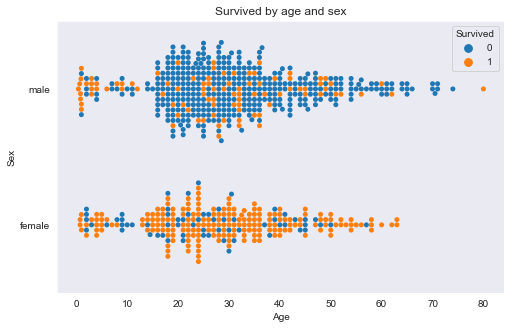

In [19]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train).set_title('Survived by age and sex')

### Survival rate determined by Fare costs

In [20]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
train.groupby(['Fare']).Survived.mean()

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

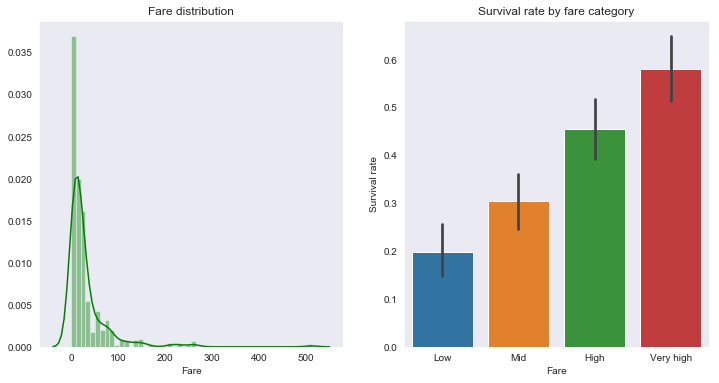

In [22]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train.Survived, ax=axarr[1]).set_ylabel('Survival rate')

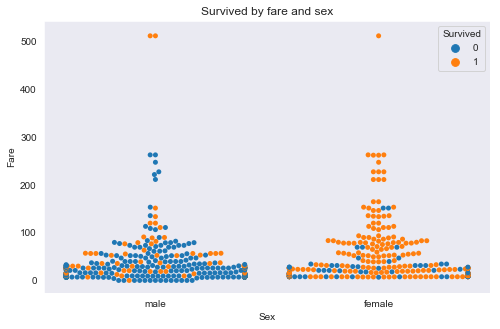

In [23]:
plt.figure(figsize=(8,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived',data=train).set_title('Survived by fare and sex')

It can be seen from the first pair of charts that the more a passenger paid for their fair (i.e. they could have purchased a first class suite) had an increasingly higher chance of survival.<br>
Whereas in the following graph, it can be seen that even still the primary survivors were mostly women, with a steadily increasing number of survivors per fare cost.

## Survival rate based upon embarkment location

* Q = Queenstown
* C = Cherbourg
* S = Southampton

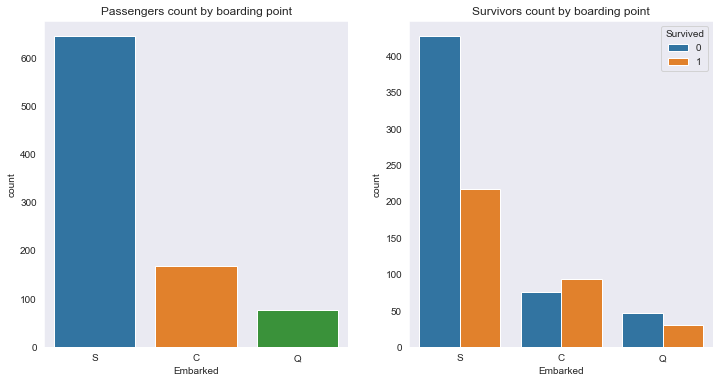

In [24]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train, ax=axarr[1]).set_title('Survivors count by boarding point')

Based upon this data we can ascertain that the embarkment location plays little role in the overall survival of passengars. Rather, the varying results can be associated with the passenger's class (i.e. first, second, or third class).

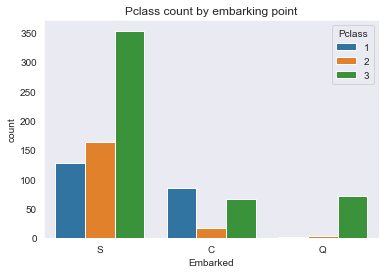

In [25]:
g = sns.countplot(data=train, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

Based upon these results we can determine:
* The majority of Queen's passengers are 3rd class
* Cherbourg passengers are mostly mixed with 1st and 3rd class
* Southampton has the greatest number of passengers overall with just under half being 2nd or 1st class.

### Survival rate by title

In [26]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [27]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Don               1
the Countess      1
Jonkheer          1
Mme               1
Sir               1
Lady              1
Capt              1
Name: Title, dtype: int64

In [28]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [29]:
train['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [30]:
train.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

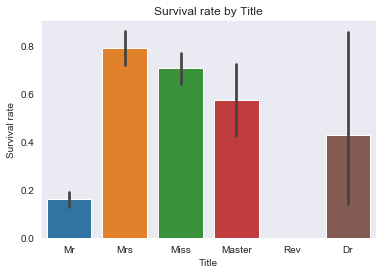

In [31]:
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', data=train).set_ylabel('Survival rate')

From this graph we can ascertain that married women had the highest survival rate, with single women falling right behind them.

### Survival rate by SibSp (Sibling/Spouse)

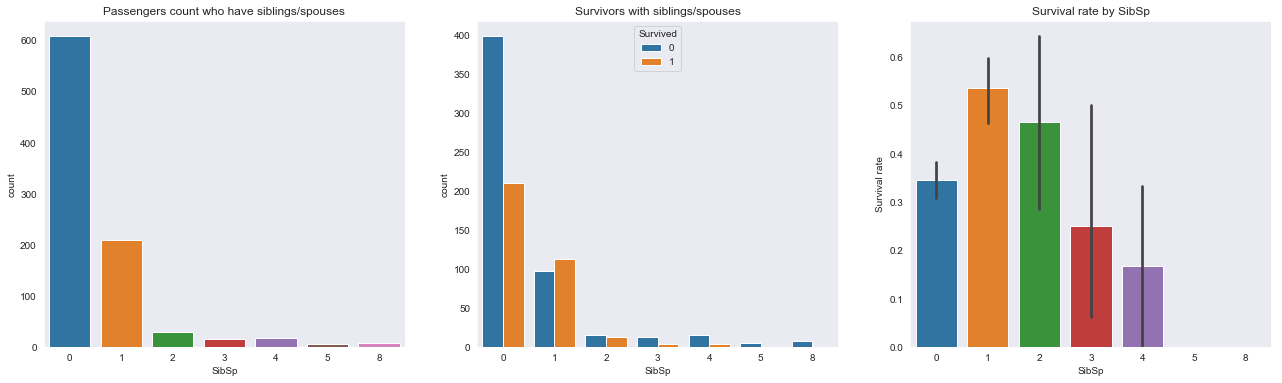

In [32]:
fig, axarr = plt.subplots(1,3,figsize=(22, 6))
sns.countplot(train['SibSp'], ax=axarr[0]).set_title('Passengers count who have siblings/spouses')
p = sns.countplot(x = 'SibSp', hue = 'Survived', data = train, ax=axarr[1]).set_title('Survivors with siblings/spouses')
axarr[2].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train, ax=axarr[2]).set_ylabel('Survival rate')

### Survival rate by Parch (Parent/Child)

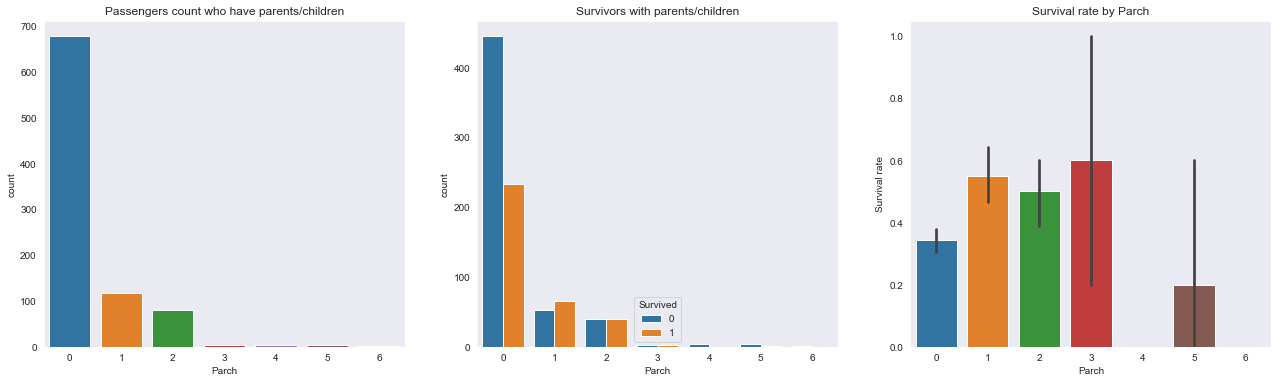

In [33]:
fig, axarr = plt.subplots(1,3,figsize=(22, 6))
sns.countplot(train['Parch'], ax=axarr[0]).set_title('Passengers count who have parents/children')
p = sns.countplot(x = 'Parch', hue = 'Survived', data = train, ax=axarr[1]).set_title('Survivors with parents/children')
axarr[2].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train, ax=axarr[2]).set_ylabel('Survival rate')

### Survival rate by family size

Given the fact we have two sets of data now pertaining to both sibling/spouse and parent/child, we can combine both of these sets (along with the individual associated with these family members) to ascertain what family sizes had the highest survival rate.

In [34]:
train['Fam_size'] = train['SibSp'] + train['Parch'] + 1
test['Fam_size'] = test['SibSp'] + test['Parch'] + 1

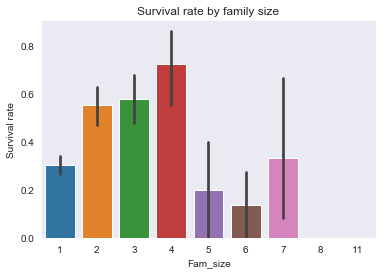

In [35]:
plt.title('Survival rate by family size')
g = sns.barplot(x=train.Fam_size, y=train.Survived).set_ylabel('Survival rate')

In [36]:
'''
0-1 - Solo
1-4 - Small
4-7 - Big
7-11 - Very big
'''
train['Fam_type'] = pd.cut(train.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test['Fam_type'] = pd.cut(test.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

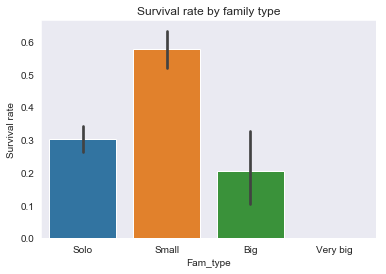

In [37]:
plt.title('Survival rate by family type')
g = sns.barplot(x=train.Fam_type, y=train.Survived).set_ylabel('Survival rate')

## Creating the Model

Now that we have collected an abundance of data from various sources, we can create a model using this data.

In [38]:
y = train['Survived']
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked', 'Fam_type']
X = train[features]
X.head()

,Pclass,Sex,Fare,Title,Embarked,Fam_type
0,3,male,7.2500,Mr,S,Small
1,1,female,71.2833,Mrs,C,Small
2,3,female,7.9250,Miss,S,Solo
3,1,female,53.1000,Mrs,S,Small
4,3,male,8.0500,Mr,S,Solo


In [42]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked', 'Fam_type']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.826


We can now make our predictions

In [ ]:
X_test = test[features]
X_test.head()

In [ ]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')